# 查看数据

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')#设置样式
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

In [7]:
data = pd.read_csv("data.csv")
data = data.drop(columns=['用户号码'])
all_features= list(data.head(0))
features = all_features[0:164]
data.head()

,是否本年新增用户,本月是否新增不出账用户,本月是否双无用户,是否非当月入网出帐三无用户,本年新发展用户连续三个月三无及极低用户,用户VIP等级,该用户身份证是否6个月内未在办理开户业务,是否为靓号,是否双卡终端,是否已订购wo加视频业务,...,上月套餐名称_地王卡,上月套餐名称_联通王卡（29元）,上月套餐名称_腾讯大王卡,上月套餐名称_腾讯天王卡,上月套餐名称_腾讯视频小王卡,上月套餐名称_腾讯音乐小王卡,漫游地1_无漫游地,漫游地1_省内漫游,漫游地1_省外漫游地,外呼结果
0,0,0,0,0,0,3,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,5,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,5,1,1,1,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,5,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,4,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [8]:
data.info()#是否有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81997 entries, 0 to 81996
Columns: 165 entries, 是否本年新增用户 to 外呼结果
dtypes: float64(41), int64(124)
memory usage: 103.2 MB


# 缺失值处理

In [9]:
data["首次缴费月份"].unique()
data.groupby(["首次缴费月份"])["首次缴费月份"].count()#看有多少个

首次缴费月份
201503.0      35
201504.0     115
201506.0     291
201507.0     128
201508.0     108
201509.0      80
201510.0      71
201511.0      22
201512.0      83
201601.0      66
201602.0     106
201603.0      91
201604.0      72
201605.0      85
201606.0      79
201607.0      60
201608.0      59
201609.0      53
201610.0      81
201611.0    1309
201612.0    1872
201701.0    1689
201702.0    1654
201703.0    2379
201704.0    2395
201705.0    2109
201706.0    2061
201707.0    2463
201708.0    2995
201709.0    2938
201710.0    2415
201711.0    2440
201712.0    2435
201801.0    3663
201802.0    4628
201803.0    4391
201804.0    2896
201805.0    2401
201806.0    3591
201807.0    3001
201808.0    3399
201809.0    3150
201810.0    2742
201811.0    2592
201812.0    2217
201901.0    2891
201902.0    3039
201903.0    2111
201904.0    1356
201905.0     943
201906.0     117
201907.0      14
Name: 首次缴费月份, dtype: int64

In [10]:
data["首次缴费月份"] = data["首次缴费月份"].fillna(201802)#众数填充

# 划分数据集

In [11]:
X = data[features]
Y = data['外呼结果']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("X_train=", x_train)
print("X_test=", x_test)
print("Y_train=", y_train)
print("Y_test=", y_test)

X_train=        是否本年新增用户  本月是否新增不出账用户  本月是否双无用户  是否非当月入网出帐三无用户  本年新发展用户连续三个月三无及极低用户  \
53660         0            0         0              0                    0   
52149         0            0         0              0                    0   
81606         1            0         0              0                    0   
81111         1            0         0              0                    0   
53878         0            0         0              0                    0   
...         ...          ...       ...            ...                  ...   
6265          0            0         0              0                    0   
54886         0            0         0              0                    0   
76820         1            0         0              0                    0   
860           0            0         0              0                    0   
15795         0            0         0              0                    0   

       用户VIP等级  该用户身份证是否6个月内未在办理开户业务  是否为靓号  是否双卡终端  是

In [13]:
print(sum(y_train == 0)/len(y_train))
sum(y_test == 0)/len(y_test)

0.8700099191830496


0.8698536585365854

# 数据探索性分析

## 成功率

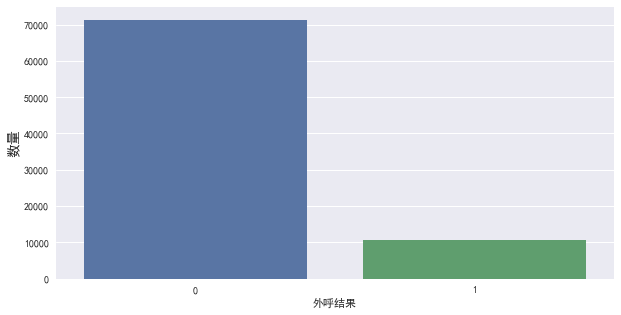

In [14]:
plt.figure(1 , figsize = (10 , 5))
sns.countplot(x = '外呼结果' , data = data)#柱状图
plt.ylabel('数量',fontsize=14)
plt.show()

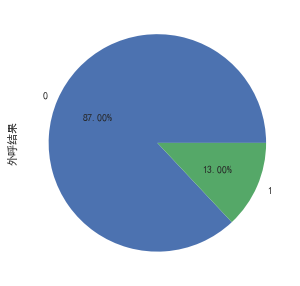

In [15]:
plt.figure(1 , figsize = (10 , 5))
data['外呼结果'].value_counts().plot.pie(autopct = '%.2f%%')#查看成功比例

## 本月是否新增不出账用户的影响

### 该特征比例

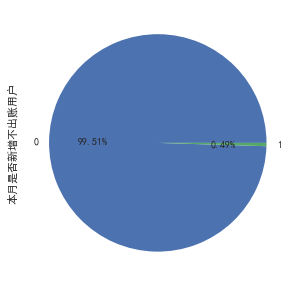

In [16]:
plt.figure(1 , figsize = (10 , 5))
data.groupby('本月是否新增不出账用户')['本月是否新增不出账用户'].count().plot.pie(autopct = '%.2f%%')

### 该特征与成功的关系

本月是否新增不出账用户  外呼结果
0            0       71000
             1       10598
1            0         335
             1          64
Name: 外呼结果, dtype: int64


<Figure size 720x360 with 0 Axes>

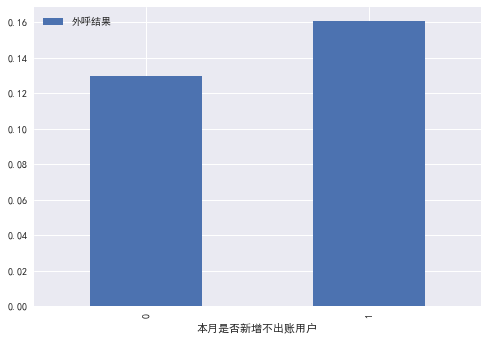

In [18]:
#特征与是否生存的关系 
plt.figure(1 , figsize = (10 , 5))
print(data.groupby(['本月是否新增不出账用户','外呼结果'])['外呼结果'].count())
data[['本月是否新增不出账用户','外呼结果']].groupby(['本月是否新增不出账用户']).mean().plot.bar()

## 用户vip等级的影响

### 特征比例

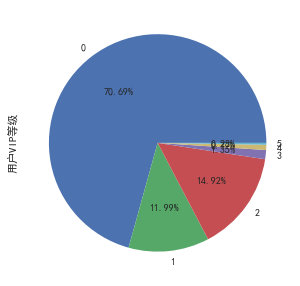

In [19]:
plt.figure(1 , figsize = (10 , 5))
data.groupby('用户VIP等级')['用户VIP等级'].count().plot.pie(autopct = '%.2f%%')

### 特征与成功的关系

用户VIP等级  外呼结果
0        0       50577
         1        7388
1        0        8612
         1        1216
2        0       10373
         1        1860
3        0         977
         1         133
4        0         587
         1          47
5        0         209
         1          18
Name: 用户VIP等级, dtype: int64


<Figure size 720x360 with 0 Axes>

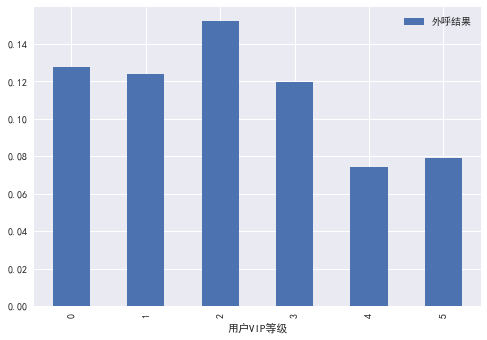

In [20]:
plt.figure(1 , figsize = (10 , 5))
print(data.groupby(['用户VIP等级','外呼结果'])['用户VIP等级'].count())
data[['用户VIP等级','外呼结果']].groupby(['用户VIP等级']).mean().plot.bar()

## 总通话时长(分钟)的影响

### 该特征各部分的比例

Text(0.5, 0, '总通话时长(分钟)')

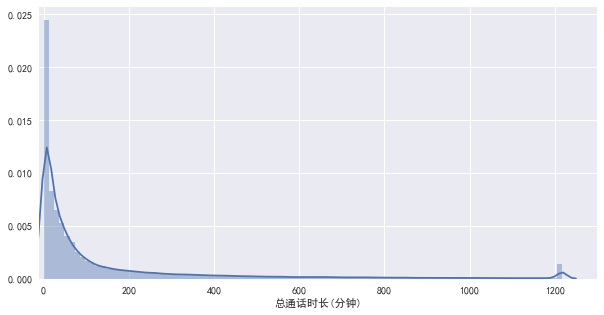

In [21]:
plt.figure(1 , figsize = (10 , 5))
sns.distplot(data['总通话时长(分钟)'],bins=100)
plt.xlim(([-10,1300]))
plt.xlabel('总通话时长(分钟)')

## 年龄与呼叫成功的关系

Text(0.5, 0, '外呼结果')

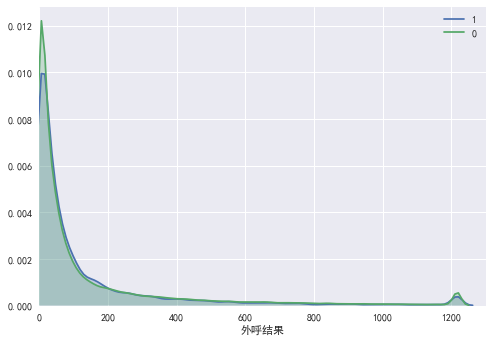

In [22]:
sns.kdeplot(data['总通话时长(分钟)'][data['外呼结果']==1], label='1', shade=True)
sns.kdeplot(data['总通话时长(分钟)'][data['外呼结果']==0], label='0', shade=True)
plt.xlim(([0,1300]))
plt.xlabel('外呼结果')

# 特征选择

In [23]:
#分析数据间关系,选择特征 
data.corr() 

,是否本年新增用户,本月是否新增不出账用户,本月是否双无用户,是否非当月入网出帐三无用户,本年新发展用户连续三个月三无及极低用户,用户VIP等级,该用户身份证是否6个月内未在办理开户业务,是否为靓号,是否双卡终端,是否已订购wo加视频业务,...,上月套餐名称_地王卡,上月套餐名称_联通王卡（29元）,上月套餐名称_腾讯大王卡,上月套餐名称_腾讯天王卡,上月套餐名称_腾讯视频小王卡,上月套餐名称_腾讯音乐小王卡,漫游地1_无漫游地,漫游地1_省内漫游,漫游地1_省外漫游地,外呼结果
是否本年新增用户,1.000000,0.016444,0.025779,0.024117,0.027696,-0.208630,-0.595453,0.017579,0.025742,-0.013774,...,-0.013159,0.001982,0.003856,0.012955,-0.008461,-0.003963,0.024227,-0.013600,-0.019173,-0.000630
本月是否新增不出账用户,0.016444,1.000000,0.261398,-0.004122,-0.000733,-0.007342,-0.012973,-0.002571,-0.165731,0.010809,...,-0.000461,-0.000810,0.002063,-0.002490,-0.001564,-0.000733,0.015897,-0.000403,-0.016364,0.006315
本月是否双无用户,0.025779,0.261398,1.000000,0.840961,0.116079,-0.010695,-0.011822,0.000687,-0.158368,0.006270,...,-0.012639,-0.000812,0.016778,-0.009136,-0.001568,-0.000734,0.046103,-0.014540,-0.041521,-0.005271
是否非当月入网出帐三无用户,0.024117,-0.004122,0.840961,1.000000,0.138088,-0.010128,-0.010570,0.001474,-0.125082,0.003048,...,-0.013234,-0.000683,0.018316,-0.010826,-0.001319,-0.000618,0.038567,-0.012228,-0.034705,-0.006128
本年新发展用户连续三个月三无及极低用户,0.027696,-0.000733,0.116079,0.138088,1.000000,-0.005983,-0.021361,-0.001126,-0.023939,-0.000408,...,0.001366,-0.000121,-0.001993,0.001332,-0.000234,-0.000110,0.007171,-0.002173,-0.006497,-0.004051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
上月套餐名称_腾讯音乐小王卡,-0.003963,-0.000733,-0.000734,-0.000618,-0.000110,0.011177,0.001236,-0.001126,0.000509,-0.000408,...,-0.004791,-0.000121,-0.018104,-0.003030,-0.000234,1.000000,0.004673,-0.002173,-0.003898,-0.000589
漫游地1_无漫游地,0.024227,0.015897,0.046103,0.038567,0.007171,-0.006095,-0.036274,-0.004212,-0.021973,-0.002320,...,-0.037506,0.003409,0.048695,-0.026909,0.007115,0.004673,1.000000,-0.303057,-0.906078,-0.023803
漫游地1_省内漫游,-0.013600,-0.000403,-0.014540,-0.012228,-0.002173,0.025993,0.003852,0.018668,0.001391,-0.000181,...,0.031166,-0.002402,-0.045056,0.029415,-0.001896,-0.002173,-0.303057,1.000000,-0.128620,0.003144
漫游地1_省外漫游地,-0.019173,-0.016364,-0.041521,-0.034705,-0.006497,-0.005198,0.036038,-0.003905,0.022248,0.002495,...,0.025193,-0.002481,-0.030669,0.014943,-0.006562,-0.003898,-0.906078,-0.128620,1.000000,0.023374


# 对测试集进行处理

In [24]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20500 entries, 21356 to 7555
Columns: 164 entries, 是否本年新增用户 to 漫游地1_省外漫游地
dtypes: float64(41), int64(123)
memory usage: 25.8 MB


# 建模分析

## 逻辑回归

In [25]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [26]:
# 逻辑回归模型

penaltys = ['l1','l2']
Cs = [0.01, 0.1,0.2,0.5,0.8, 1, 10, 100, 1000]
params= dict(penalty = penaltys, C = Cs)
lr = LogisticRegression()
grid_search=GridSearchCV(lr,param_grid=params,cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [27]:
grid_search.score(x_train,y_train)

0.8700099191830496

In [28]:
y_predict1 = grid_search.predict_proba(x_test)[:,1]#测试集上预测的结果
y_predict1

array([0.11465958, 0.09477808, 0.10340949, ..., 0.09943597, 0.099138  ,
       0.14862605])

0.5956481718763766


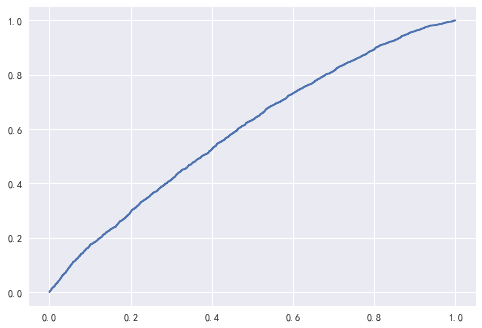

In [29]:
fpr, tpr, thresholds  =  roc_curve(y_test, y_predict1) 
plt.plot(fpr,tpr)
plt.show
roc_auc =auc(fpr, tpr) 
print(roc_auc)

## KNN 

In [31]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
params={'n_neighbors':[2,3,4,5,6,7,8,9]}
grid_search=GridSearchCV(knn,param_grid=params,cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'n_neighbors': 8}

In [33]:
grid_search.score(x_train,y_train)

0.8706115745483519

In [34]:
y_predict2 = grid_search.predict_proba(x_test)[:,1]#测试集上预测的结果
y_predict2

array([0.25 , 0.25 , 0.25 , ..., 0.   , 0.125, 0.25 ])

0.5416034937611949


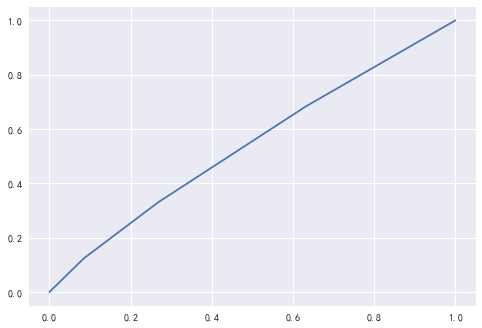

In [35]:
fpr, tpr, thresholds  =  roc_curve(y_test, y_predict2) 
plt.plot(fpr,tpr)
plt.show
roc_auc =auc(fpr, tpr) 
print(roc_auc)

## 决策树

In [36]:
from sklearn import tree

In [37]:
dtree = tree.DecisionTreeClassifier(max_depth=8,class_weight='balanced')
params={'max_depth':[2,3,4,5,6,7,8,9]}
grid_search=GridSearchCV(dtree,param_grid=params,cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': 3}

In [40]:
print(grid_search.score(x_train,y_train))
y_predict3 = grid_search.predict_proba(x_test)[:,1]
y_predict3

0.6935785485470836


array([0.54636578, 0.33461489, 0.54636578, ..., 0.4845418 , 0.48937688,
       0.48937688])

0.6042820089786869


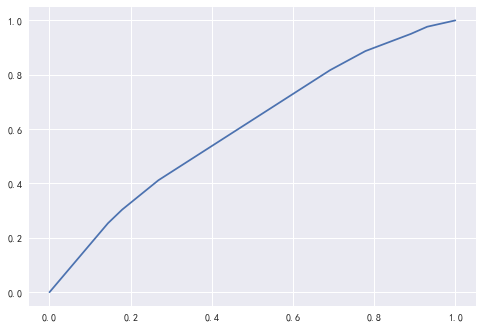

In [41]:
fpr, tpr, thresholds  =  roc_curve(y_test, y_predict3) 
plt.plot(fpr,tpr)
plt.show
roc_auc =auc(fpr, tpr) 
print(roc_auc)

## 随机森林

In [58]:
from sklearn.ensemble import RandomForestClassifier

0.6337093692386646


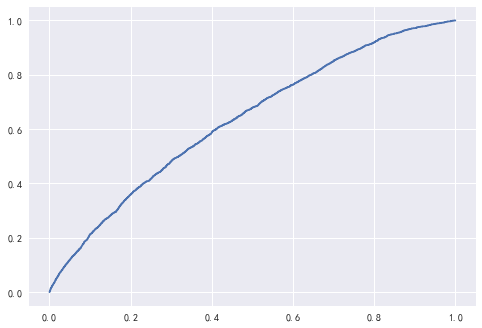

In [61]:
RF = RandomForestClassifier(max_depth=8,n_estimators=100,class_weight='balanced')
RF.fit(x_train,y_train)
self_predict = RF.predict_proba(x_test)[:,1]
fpr, tpr, thresholds  =  roc_curve(y_test, self_predict) 
plt.plot(fpr,tpr)
plt.show
roc_auc =auc(fpr, tpr) 
print(roc_auc)